In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

In [2]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26389 entries, 0 to 26388
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26389 non-null  int64  
 1   car           26389 non-null  int64  
 2   reality       26389 non-null  int64  
 3   income_total  26389 non-null  float64
 4   income_type   26389 non-null  float64
 5   edu_type      26389 non-null  int64  
 6   family_type   26389 non-null  float64
 7   house_type    26389 non-null  float64
 8   work_phone    26389 non-null  int64  
 9   phone         26389 non-null  int64  
 10  email         26389 non-null  int64  
 11  occyp_type    26389 non-null  float64
 12  family_size   26389 non-null  float64
 13  begin_month   26389 non-null  float64
 14  credit        26389 non-null  float64
 15  id            26389 non-null  int64  
 16  age           26389 non-null  float64
 17  experience    26389 non-null  float64
 18  income_rate   26389 non-nu

In [4]:
train['gender'] = train['gender'].astype('object')
train['car'] = train['car'].astype('object')
train['reality'] = train['reality'].astype('object')
train['income_type'] = train['income_type'].astype('object')
train['edu_type'] = train['edu_type'].astype('object')
train['family_type'] = train['family_type'].astype('object')
train['house_type'] = train['house_type'].astype('object')
train['occyp_type'] = train['occyp_type'].astype('object')

test['gender'] = test['gender'].astype('object')
test['car'] = test['car'].astype('object')
test['reality'] = test['reality'].astype('object')
test['income_type'] = test['income_type'].astype('object')
test['edu_type'] = test['edu_type'].astype('object')
test['family_type'] = test['family_type'].astype('object')
test['house_type'] = test['house_type'].astype('object')
test['occyp_type'] = test['occyp_type'].astype('object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26389 entries, 0 to 26388
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26389 non-null  object 
 1   car           26389 non-null  object 
 2   reality       26389 non-null  object 
 3   income_total  26389 non-null  float64
 4   income_type   26389 non-null  object 
 5   edu_type      26389 non-null  object 
 6   family_type   26389 non-null  object 
 7   house_type    26389 non-null  object 
 8   work_phone    26389 non-null  int64  
 9   phone         26389 non-null  int64  
 10  email         26389 non-null  int64  
 11  occyp_type    26389 non-null  object 
 12  family_size   26389 non-null  float64
 13  begin_month   26389 non-null  float64
 14  credit        26389 non-null  float64
 15  id            26389 non-null  int64  
 16  age           26389 non-null  float64
 17  experience    26389 non-null  float64
 18  income_rate   26389 non-nu

In [6]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  8


In [7]:
numerical_feats

['income_total',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'id',
 'age',
 'experience',
 'income_rate',
 'start_work',
 'n_card',
 'extra_card',
 'income_abcd',
 'begin_abcd',
 'ability',
 'owned',
 'property']

In [8]:
categorical_feats

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [9]:
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
test[categorical_feats] = encoder.transform(test[categorical_feats])

## 하이퍼 파라미터 찾기 

In [10]:
X = train.drop('credit', axis=1)
y = train['credit'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
models = CatBoostClassifier()

In [18]:
#!pip install teddynote

In [27]:
from teddynote import models

catboostoptuna = models.CatBoostClassifierOptuna(use_gpu=False)

params, preds = catboostoptuna.optimize(train.drop('credit', 1), 
                                        train['credit'], 
                                        test_data=train.drop('credit', 1),
                                        seed=321,
                                        eval_metric='accuracy', n_trials=3)

(np.squeeze(preds) == train['credit']).mean()

[I 2022-03-30 02:33:50,093] A new study created in memory with name: no-name-f2b9a83f-ac8c-4158-b297-948a86644d3e


metric type: accuracy, score: 0.69136
metric type: accuracy, score: 0.69989
metric type: accuracy, score: 0.69344
metric type: accuracy, score: 0.67829


[I 2022-03-30 02:34:03,895] Trial 0 finished with value: 0.6911971582944509 and parameters: {'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'od_type': 'IncToDec', 'colsample_bylevel': 0.04086453256466515, 'l2_leaf_reg': 0.019766966397091027, 'learning_rate': 0.2292870750664585, 'iterations': 541, 'min_child_samples': 10, 'depth': 12, 'bagging_temperature': 22.835436264662434}. Best is trial 0 with value: 0.6911971582944509.


metric type: accuracy, score: 0.69301
metric type: accuracy, score: 0.70235
metric type: accuracy, score: 0.70955
metric type: accuracy, score: 0.69951
metric type: accuracy, score: 0.69041


[I 2022-03-30 02:41:12,673] Trial 1 finished with value: 0.7006328664441621 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.09477465463238516, 'l2_leaf_reg': 7.023354246057416e-05, 'learning_rate': 0.051438606486204574, 'iterations': 1744, 'min_child_samples': 24, 'depth': 5}. Best is trial 1 with value: 0.7006328664441621.


metric type: accuracy, score: 0.70135
metric type: accuracy, score: 0.69572
metric type: accuracy, score: 0.70841
metric type: accuracy, score: 0.69648
metric type: accuracy, score: 0.68909


[I 2022-03-30 02:44:26,893] Trial 2 finished with value: 0.6970327954115765 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'Iter', 'colsample_bylevel': 0.08510027230542444, 'l2_leaf_reg': 1.622522039386701e-07, 'learning_rate': 0.18469566496373052, 'iterations': 1302, 'min_child_samples': 20, 'depth': 3}. Best is trial 1 with value: 0.7006328664441621.


metric type: accuracy, score: 0.69547
saving model...models\CatBoostClassifier-0.70063.npy


0.7159801432415022

In [28]:
catboostoptuna.get_best_params()

{'bootstrap_type': 'MVS',
 'boosting_type': 'Ordered',
 'od_type': 'IncToDec',
 'colsample_bylevel': 0.09477465463238516,
 'l2_leaf_reg': 7.023354246057416e-05,
 'learning_rate': 0.051438606486204574,
 'iterations': 1744,
 'min_child_samples': 24,
 'depth': 5}

In [29]:
catboost_params = catboostoptuna.get_best_params()

In [30]:
n_est = 300
seed = 42
n_fold = 5
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [31]:
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
    folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'id']
for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

    model_cat = CatBoostClassifier(**catboost_params)
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')



----------------- Fold 0 -----------------

0:	learn: 1.0762614	test: 1.0762639	best: 1.0762639 (0)	total: 36.2ms	remaining: 1m 3s
100:	learn: 0.7447665	test: 0.6996268	best: 0.6996268 (100)	total: 7.17s	remaining: 1m 56s
200:	learn: 0.7294063	test: 0.6801383	best: 0.6801383 (200)	total: 14.8s	remaining: 1m 53s
300:	learn: 0.7202913	test: 0.6748589	best: 0.6748589 (300)	total: 22.8s	remaining: 1m 49s
400:	learn: 0.7129598	test: 0.6722016	best: 0.6722003 (399)	total: 30.5s	remaining: 1m 42s
500:	learn: 0.7058572	test: 0.6712657	best: 0.6712657 (500)	total: 38.2s	remaining: 1m 34s
600:	learn: 0.6994182	test: 0.6705975	best: 0.6705865 (596)	total: 44.9s	remaining: 1m 25s
700:	learn: 0.6938447	test: 0.6698334	best: 0.6698334 (700)	total: 51.6s	remaining: 1m 16s
800:	learn: 0.6875924	test: 0.6694206	best: 0.6692532 (787)	total: 59.5s	remaining: 1m 10s
900:	learn: 0.6822447	test: 0.6692273	best: 0.6690732 (869)	total: 1m 7s	remaining: 1m 2s
Stopped by overfitting detector  (100 iterations w

In [21]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

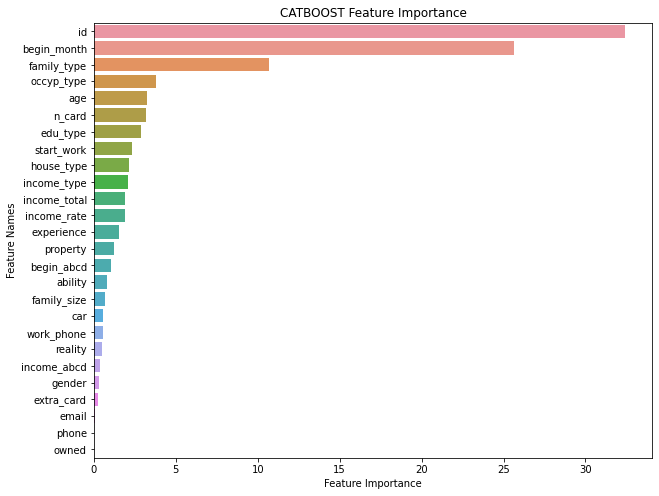

In [22]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

In [21]:
submission.iloc[:, 1:] = cat_pred_test
submission

,index,0,1,2
0,26457,0.052441,0.598191,0.349368
1,26458,0.052843,0.598954,0.348203
2,26459,0.054154,0.600796,0.345050
3,26460,0.077329,0.096561,0.826110
4,26461,0.077763,0.098208,0.824028
...,...,...,...,...
9995,36452,0.045262,0.077083,0.877655
9996,36453,0.072238,0.211280,0.716483
9997,36454,0.156114,0.277146,0.566740
9998,36455,0.063663,0.081808,0.854529


In [22]:
submission.to_csv('/Users/choejeongheon/Desktop/Credit AI/submission_final.csv', index=False)